In [2]:
pip install pylab

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


In [3]:
pip install tikzplotlib

  Using cached tikzplotlib-0.10.1-py3-none-any.whl (54 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install QuantLib

     ---------------------------------------- 12.0/12.0 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
%conda install latex

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - latex

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [19]:
%conda install matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dietd\anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 KB
    ------------------------------------------------------------
                                           Total:           9 KB

The following NEW packages will be INSTALLED:

  boltons            pkgs/main/win-64::boltons-23.0.0-py310haa95532_0 
  jsonpatch          pkgs/main/noarch::jsonpatch-1.32-pyhd3eb1b0_0 
  jsonpointer        pkgs/main/noarch::jsonpointer-2.1-pyhd3eb1b0_0 

The following packages will be UPDATED:

  conda                              23.1.0-py310haa95532_0 --> 23.3.1-py310haa95532_0 




jsonpointer-2.1      | 9 KB      |            |   0% 
jsonpointer-2.1      | 9 KB      | ########## | 100% 
jsonpoin

In [1]:
from QuantLib import *
import latex
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tplt
import pylab as pl
#%matplotlib notebook

In [2]:
# process = QuantLib 1-dimensional stochastic process object
def GeneratePaths(process, maturity, nPaths, nSteps):
    generator = UniformRandomGenerator()
    sequenceGenerator = UniformRandomSequenceGenerator(nSteps, generator)
    gaussianSequenceGenerator = GaussianRandomSequenceGenerator(sequenceGenerator)
    paths = np.zeros(shape = ((nPaths), nSteps + 1))
    pathGenerator = GaussianPathGenerator(process, maturity, nSteps, gaussianSequenceGenerator, False)
    for i in range(nPaths):
        path = pathGenerator.next().value()
        paths[i, :] = np.array([path[j] for j in range(nSteps + 1)])
    return paths

In [3]:
# common simulation-related parameters for all processes
maturity = 3.0
nPaths = 10
nSteps = int(maturity * 365)
timeGrid = np.linspace(0.0, maturity, nSteps + 1)

In [4]:
today = Date().todaysDate()
riskFreeTS = YieldTermStructureHandle(FlatForward(today, 0.05, Actual365Fixed()))
a = 0.001
sigma = 0.01
HullWhite_process = HullWhiteProcess(riskFreeTS, a, sigma)
HullWhite_Paths = GeneratePaths(HullWhite_process,maturity,nPaths,nSteps)

In [74]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    'text.usetex' : True,
    "font.family": "Times New Roman",
    "font.monospace": 'Computer Modern'
    ,"font.size": 18.5
    ,"axes.labelsize":22.5
})

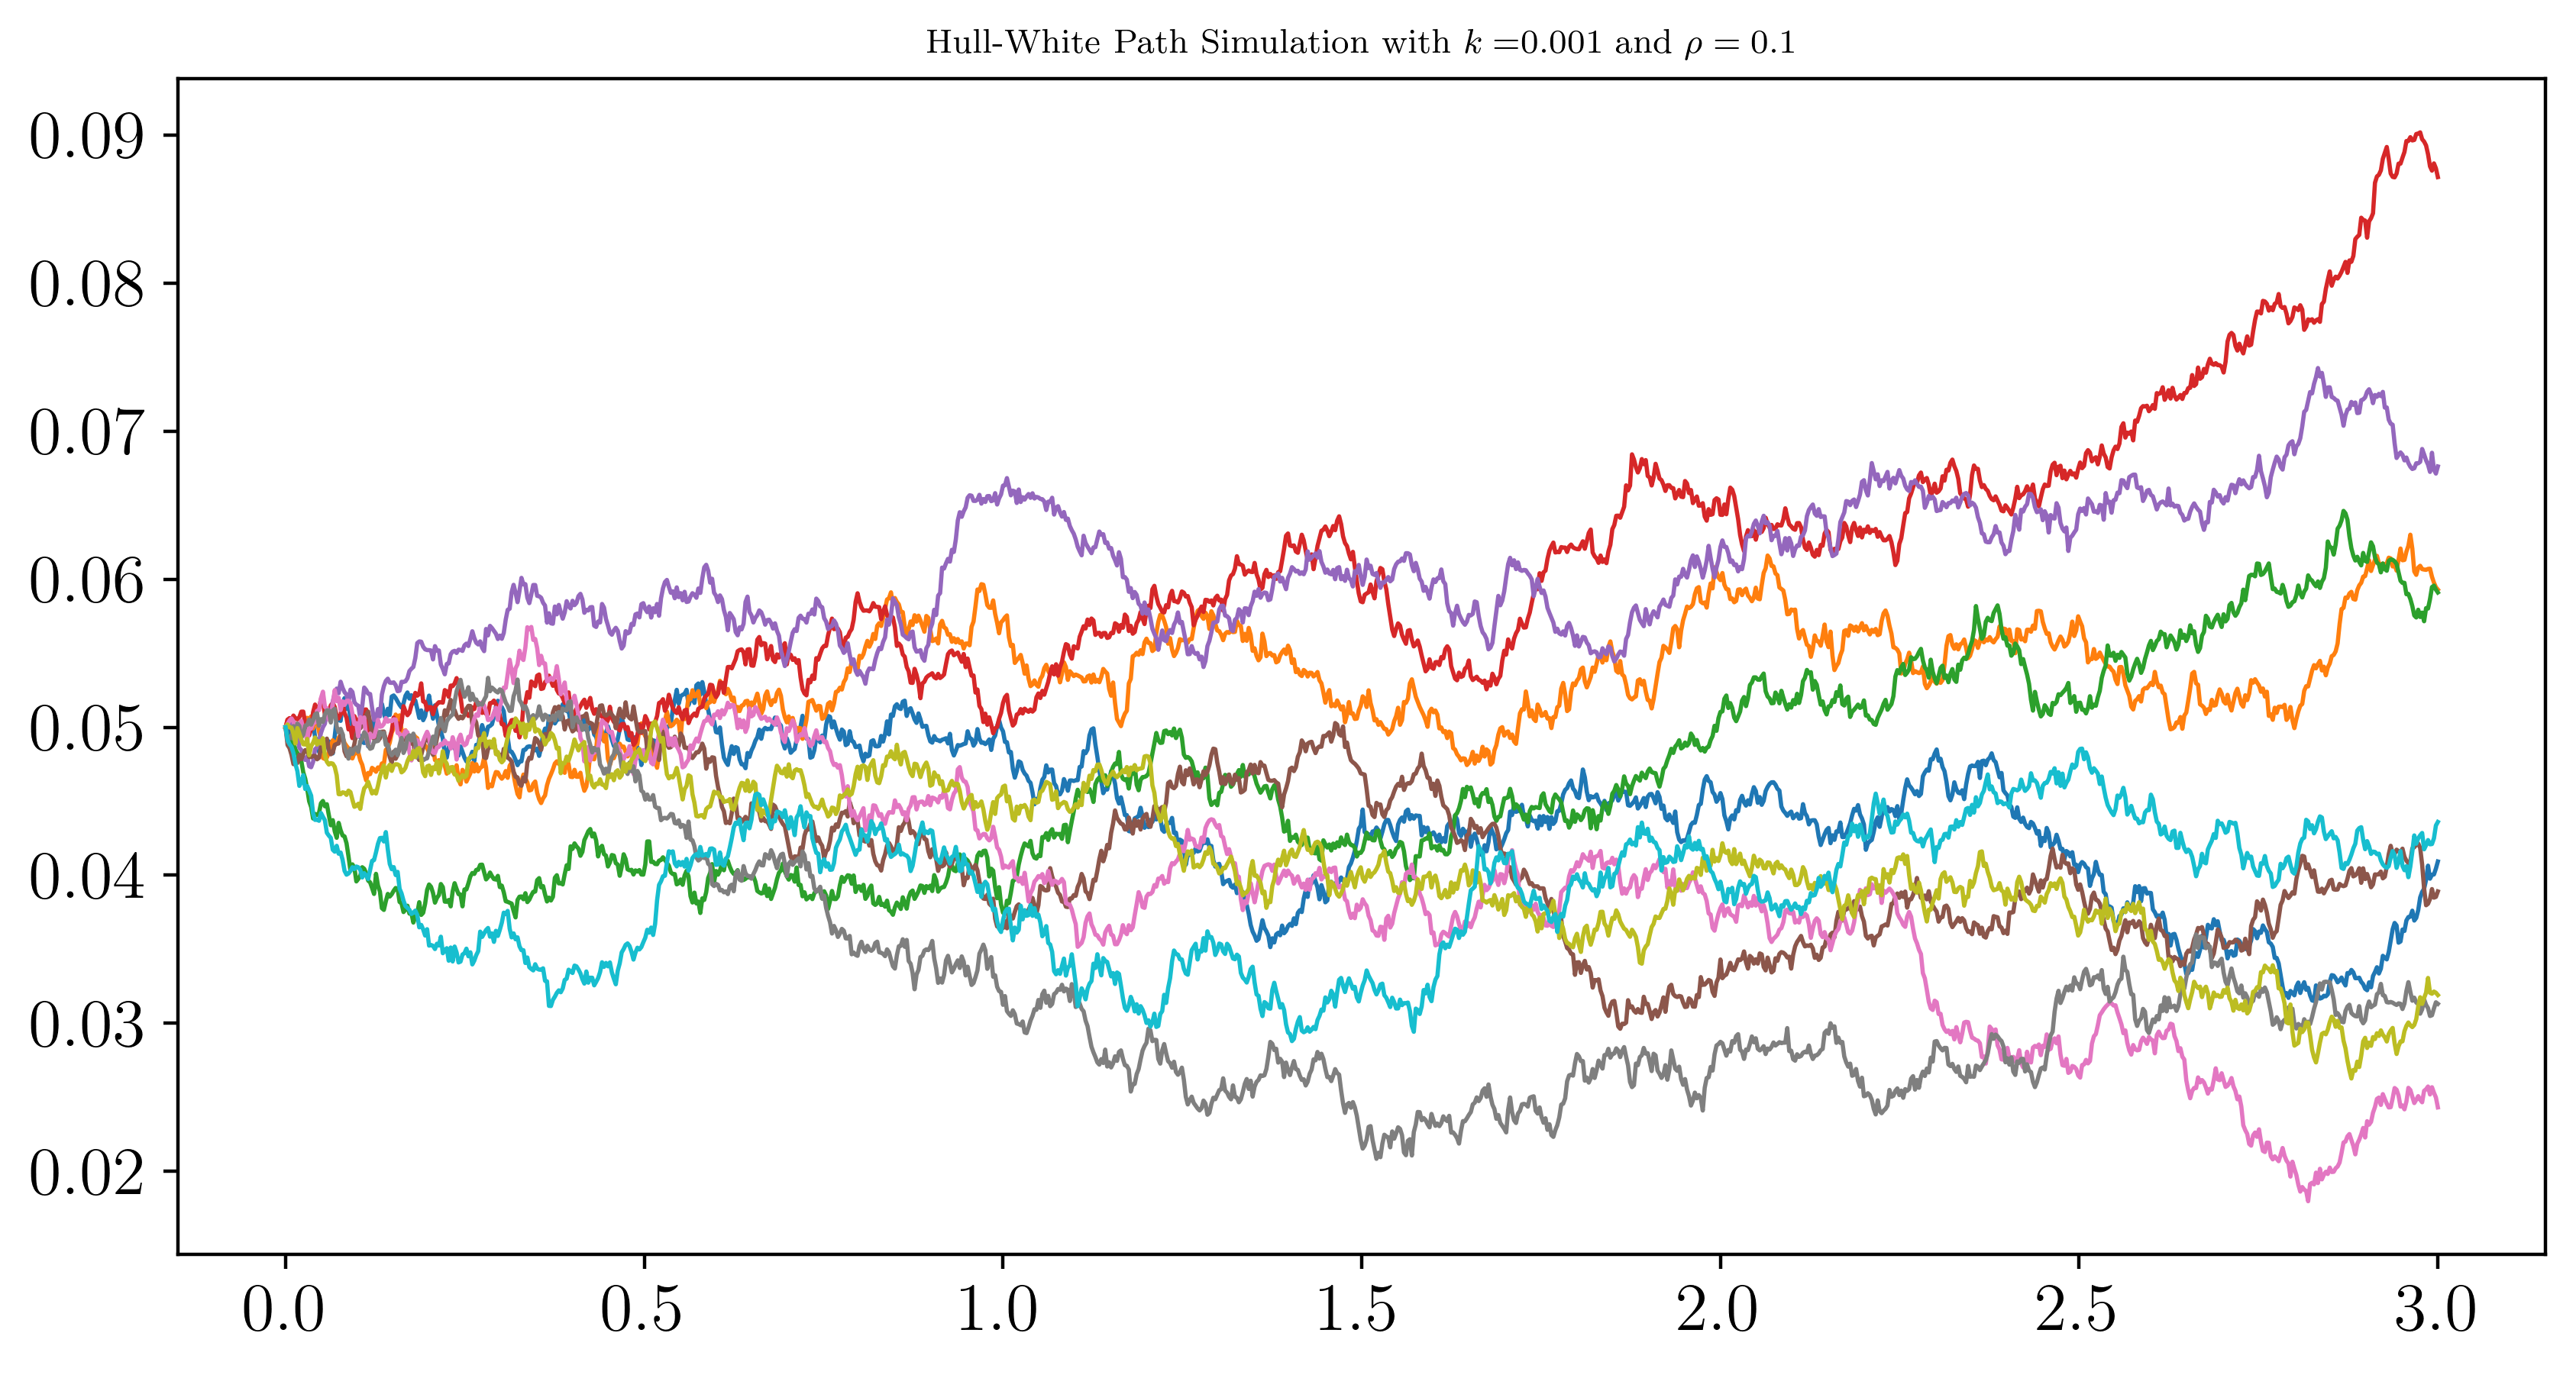

In [42]:
figure = plt.figure(figsize=(10,5),dpi=400)
for i in range(HullWhite_Paths.shape[0]):
    plt.plot(timeGrid,HullWhite_Paths[i], linewidth=1)
    pl.title(r'Hull-White Path Simulation with $k=${} and $\rho={}$'.format(a, sigma))

plt.show()

tplt.save('Tikz_HullWhite_Path')

In [7]:
def GenerateVasicekPaths(r0, k,theta,sigma,maturity,nPaths,nSteps):
    paths = np.zeros(shape=(nPaths,nSteps+1))
    paths[:,0]=r0
    timestep = maturity/nSteps
    for i in range(nPaths):
        for j in range(1,nSteps+1):
            paths[i,j]=paths[i,j-1]+k*(theta-paths[i,j-1])*timestep+sigma*np.sqrt(timestep)*np.random.normal()
    return paths

In [26]:
r0 = 0.02
k = 0.7
theta = 0.05
sigma = 0.1
maturity = 3.0
nPaths = 100
nSteps = int(maturity*365)
Vasicek_Paths = GenerateVasicekPaths(r0,k,theta,sigma,maturity,nPaths,nSteps)
Vasicek_Paths_lowvol = GenerateVasicekPaths(r0,k,theta,sigma/100, maturity,nPaths,nSteps)
display(Vasicek_Paths)

array([[0.02      , 0.02246965, 0.01610235, ..., 0.07986678, 0.08496903,
        0.0811393 ],
       [0.02      , 0.01220724, 0.01472573, ..., 0.07762698, 0.07706283,
        0.08635657],
       [0.02      , 0.02715127, 0.02234449, ..., 0.02564748, 0.02785118,
        0.02680586],
       ...,
       [0.02      , 0.02282019, 0.0229254 , ..., 0.048888  , 0.04854535,
        0.05065315],
       [0.02      , 0.02518494, 0.02483942, ..., 0.06276591, 0.06102712,
        0.06998392],
       [0.02      , 0.03195978, 0.03130941, ..., 0.02164365, 0.02551403,
        0.02132819]])

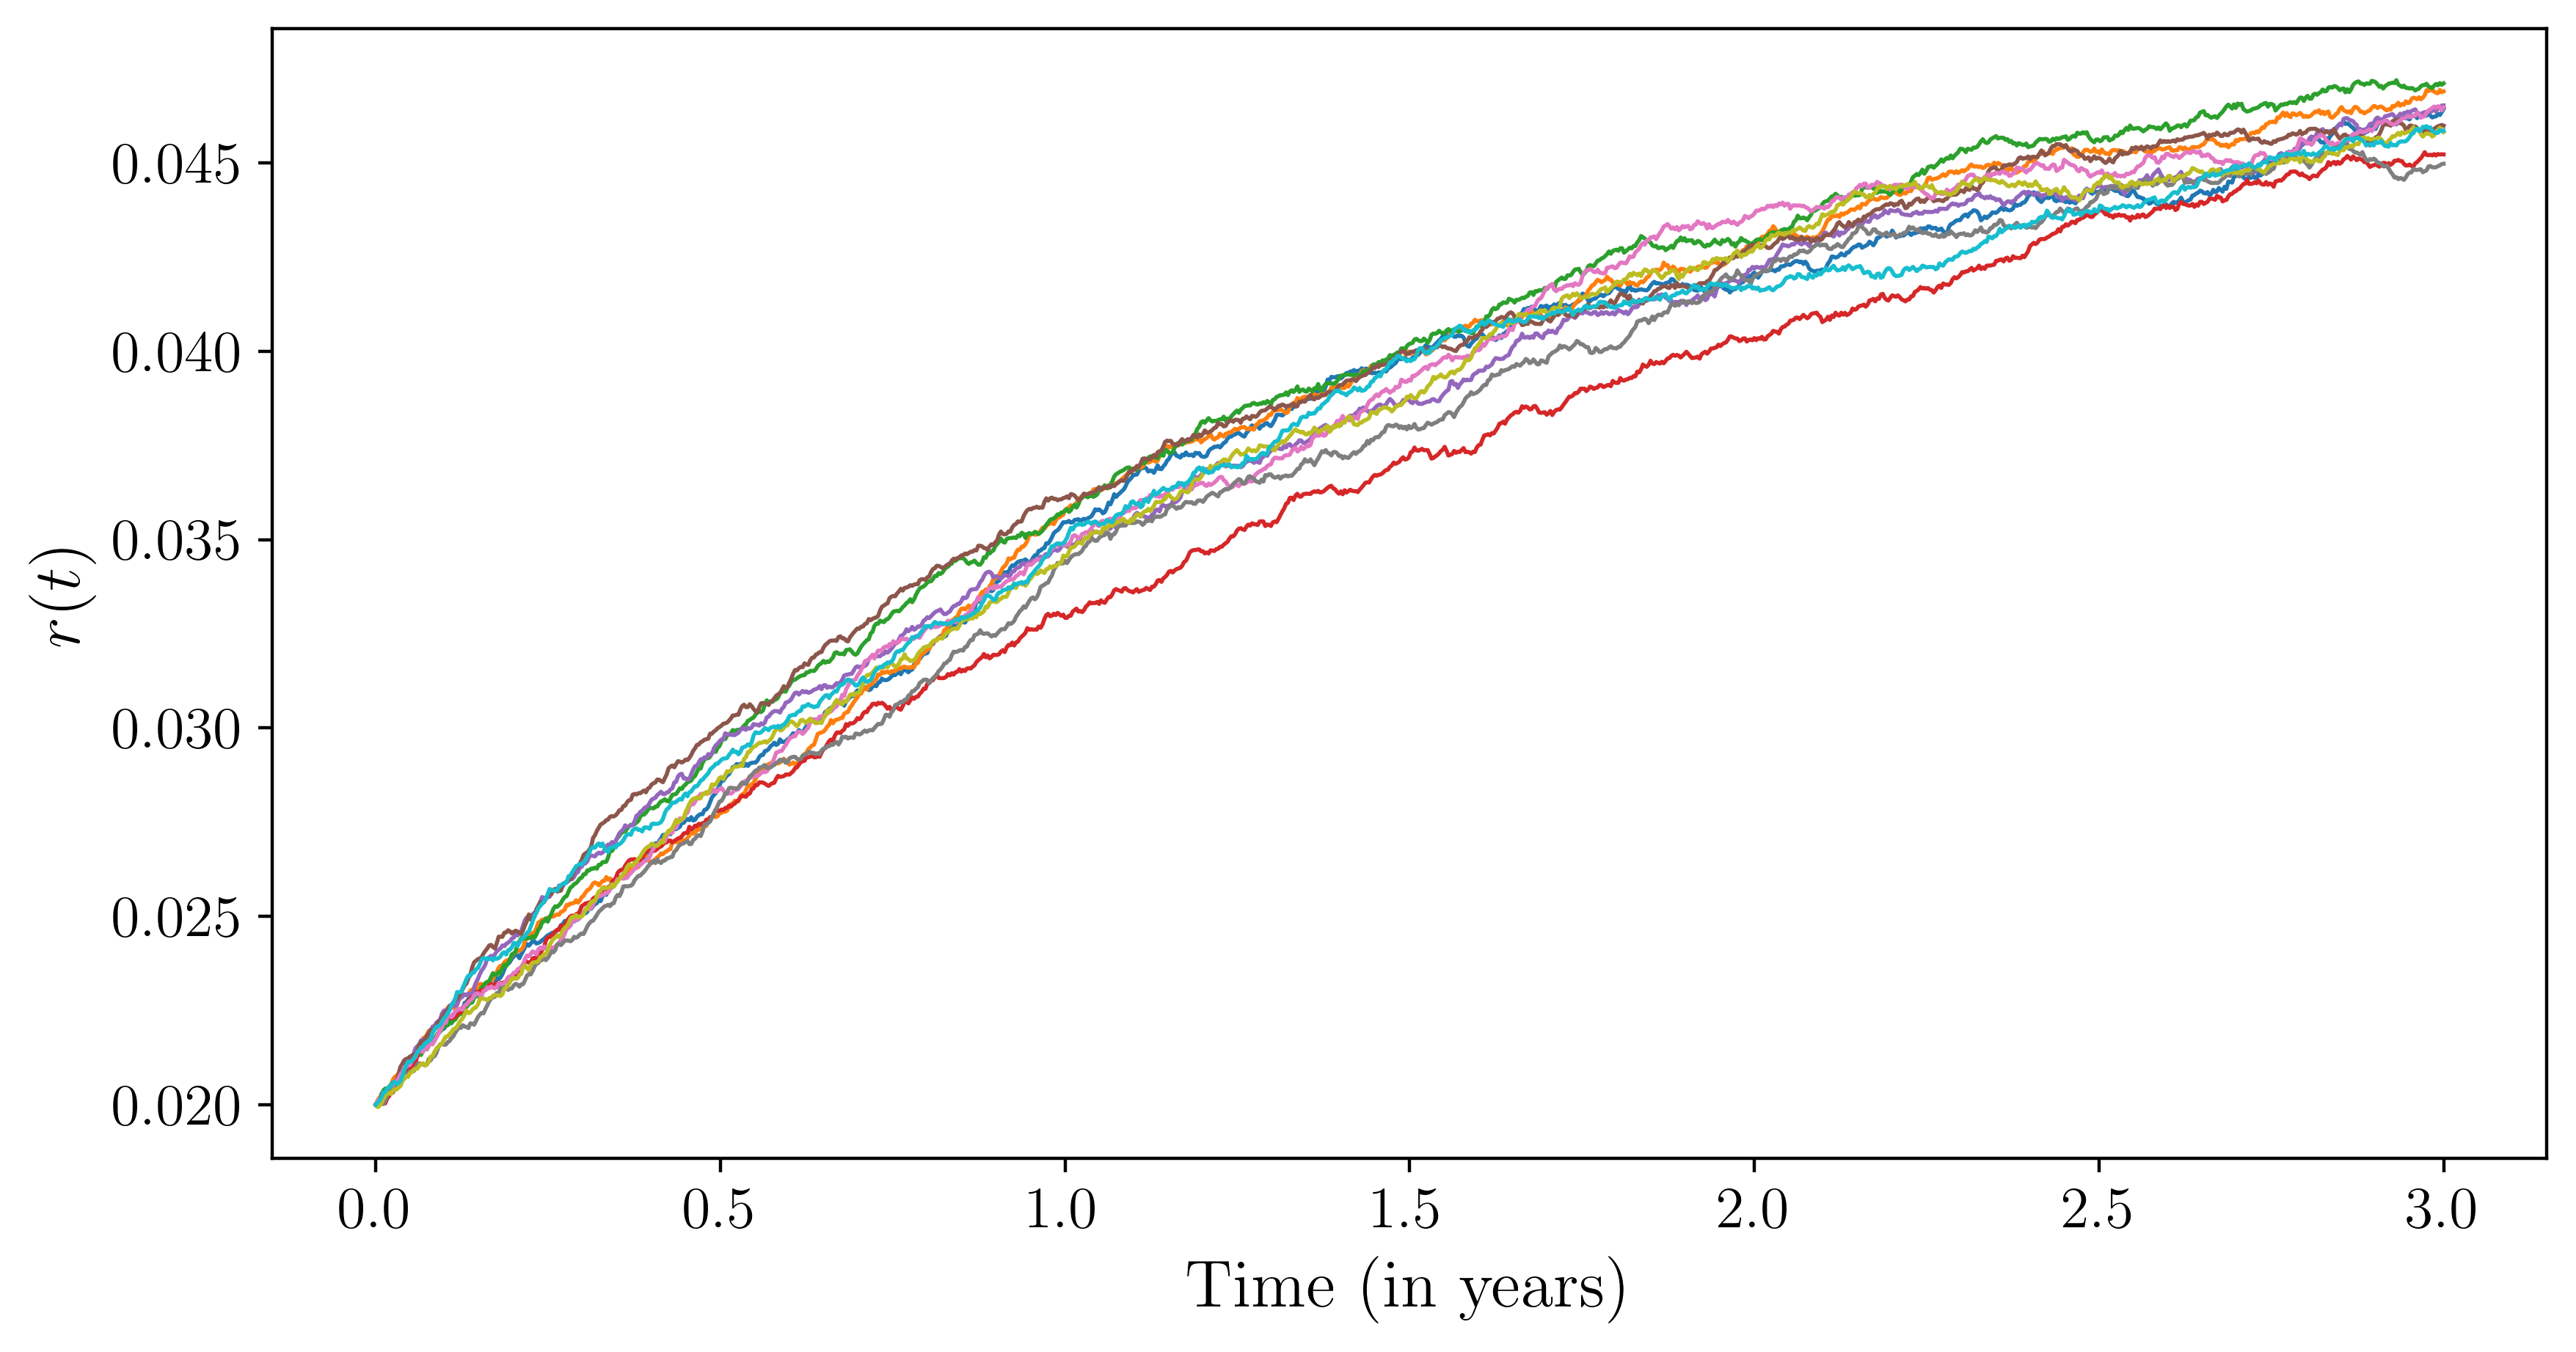

In [79]:
timeGrid = np.linspace(0,maturity,nSteps+1)

figure = plt.figure(figsize=(10,5),dpi=400)
for i in range(0,10):
    plt.plot(timeGrid,Vasicek_Paths_lowvol[i,:], linewidth=1)
#plt.title(r'Simulation of Vasicek Paths with $k={}$ 1/year, $\theta={}$ and $\rho={}$'.format(k,theta,sigma/100))
plt.xlabel(r'Time (in years)')
plt.ylabel(r'$r(t)$')
plt.savefig('VasicekPathSimulation_lowvol',bbox_inches='tight', pad_inches=0.01,dpi=400)
plt.show()

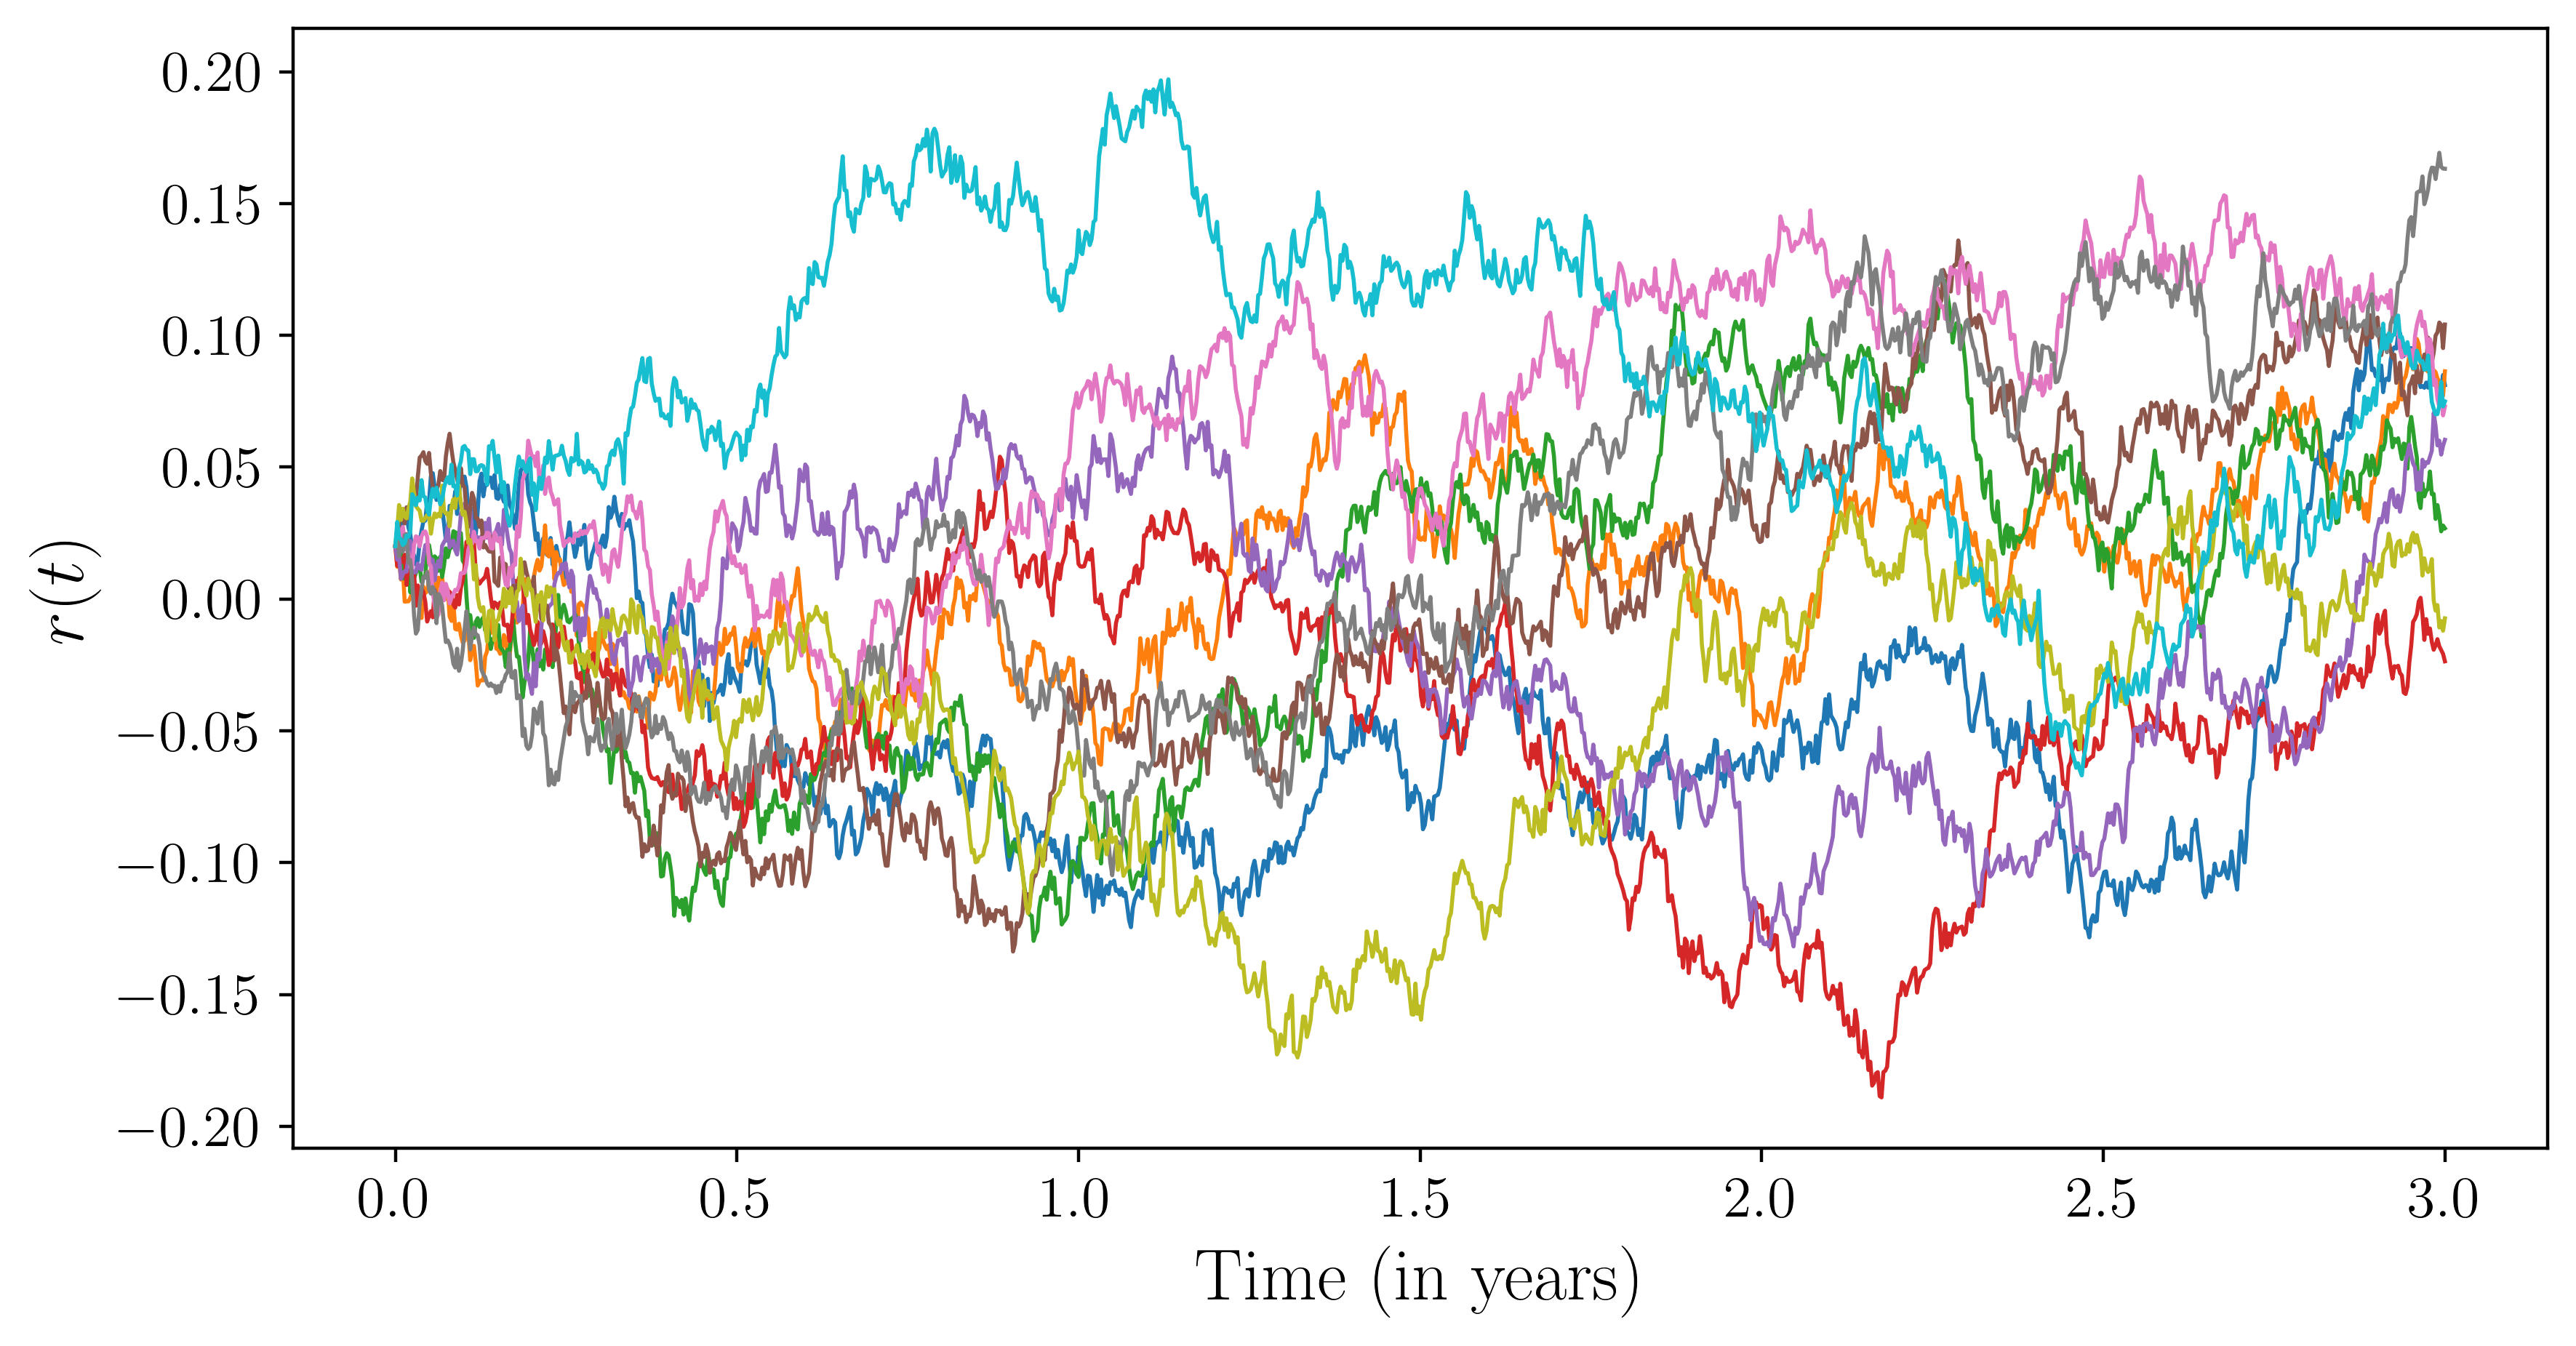

In [80]:
timeGrid = np.linspace(0,maturity,nSteps+1)

figure = plt.figure(figsize=(10,5),dpi=400)
for i in range(0,10):
    plt.plot(timeGrid,Vasicek_Paths[i,:], linewidth=1)
#plt.title(r'Simulation of Vasicek Paths with $k={}$, $\theta={}$ and $\rho={}$'.format(k,theta,sigma))
plt.xlabel(r'Time (in years)', fontsize=18)
plt.ylabel(r'$r(t)$', fontsize=18)
plt.savefig('VasicekPathSimulation', bbox_inches='tight', pad_inches=0.01,dpi=400)
plt.show()

In [81]:
def VasicekZCBPrice(r,t,s,k,theta,sigma):
    B = (1-np.exp(-k*(s-t)))/k
    A = np.exp((theta-sigma**2/(2*k))*(B-(s-t))-sigma**2/(4*k)*B**2)
    price = A*np.exp(-B*r)
    return price

0.02 0.7 0.05 0.1


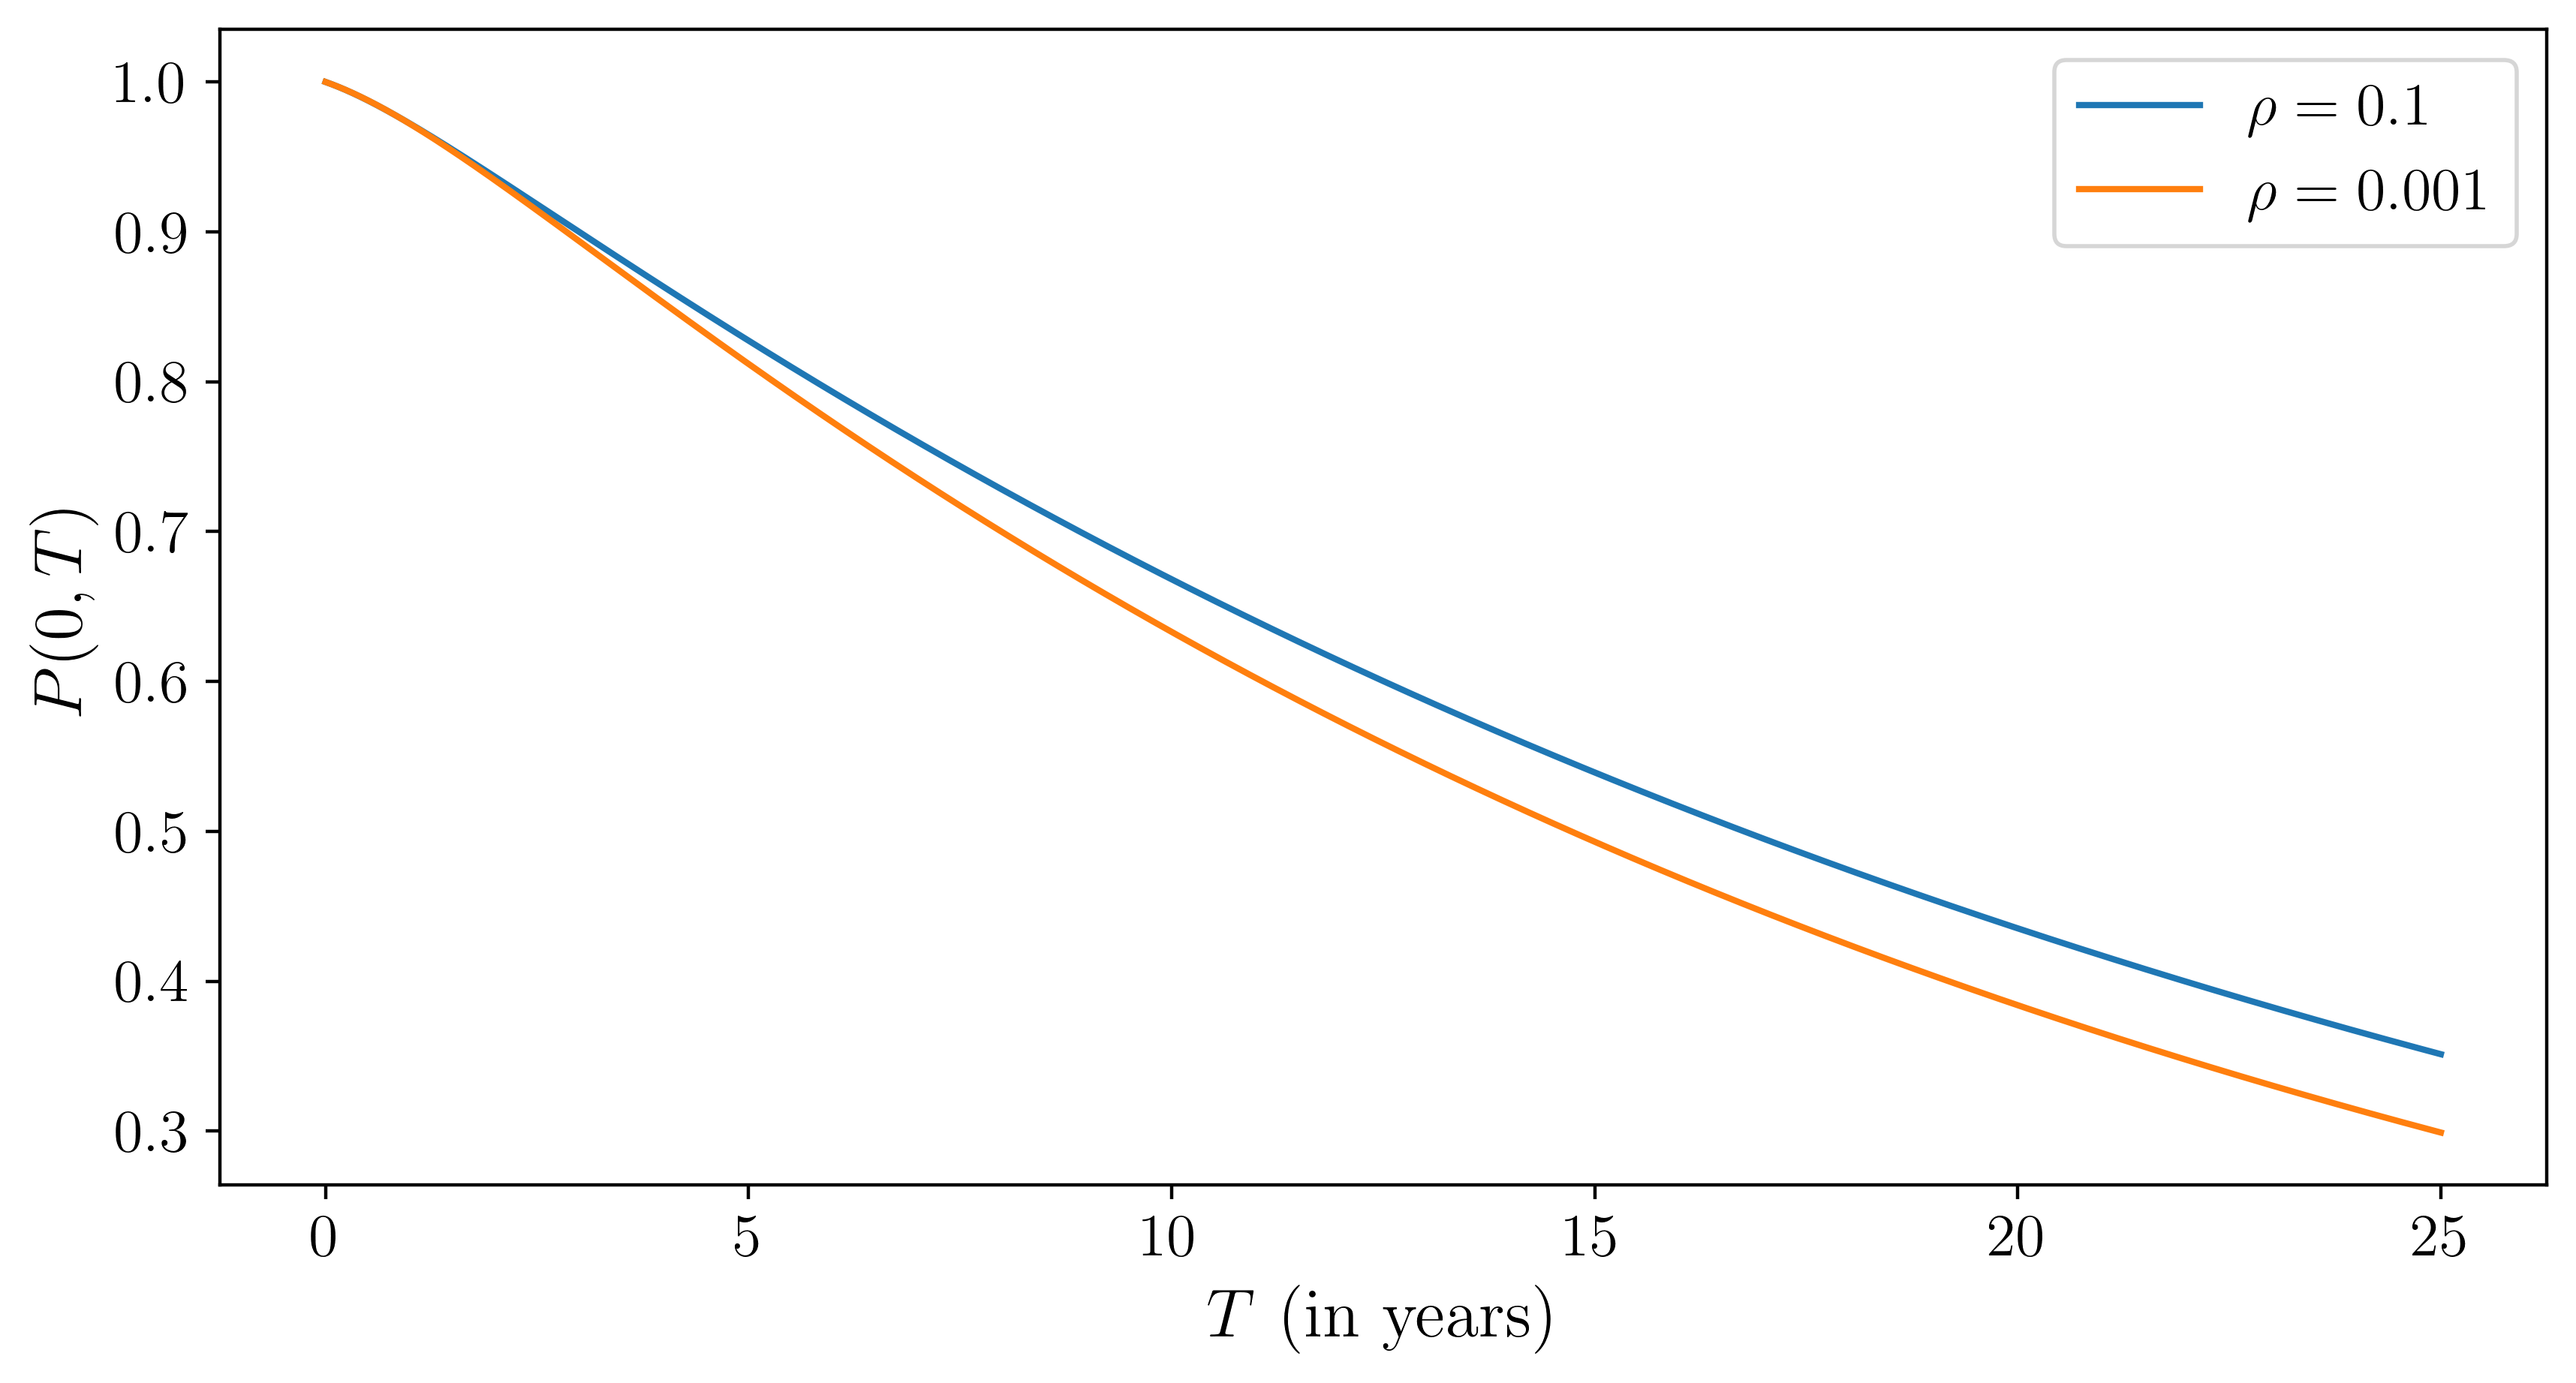

In [82]:
T_ZCB = 25
time_grid = np.linspace(0, T_ZCB, T_ZCB*365)
print(r0,k,theta,sigma)
time = [0.5,1,2]
ZCB_Price = [VasicekZCBPrice(r0,0,time_grid[i],k,theta,sigma) for i in range(len(time_grid))]
ZCB_Price_lowvol = [VasicekZCBPrice(r0,0,time_grid[i],k,theta,sigma/100) for i in range(len(time_grid))]
figure = plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_grid,ZCB_Price)
plt.plot(time_grid, ZCB_Price_lowvol)
#plt.title(r'Price of a ZCB $P(0,T)$ under Vasicek model with $r(t=0)={}$'.format(r0))
plt.legend([r'$\rho={}$'.format(sigma), r'$\rho={}$'.format(sigma/100)])
plt.xlabel(r'$T$ (in years)')
plt.ylabel(r'$P(0,T)$')
plt.savefig('VasicekZCBPrice', bbox_inches='tight', pad_inches=0.01,dpi=400)
plt.show()

In [97]:
display(ZCB_Price)

[1.0,
 0.9999452058551453,
 0.9998904124632217,
 0.9998356198265531,
 0.9997808279474679,
 0.9997260368282785,
 0.9996712464713121,
 0.9996164568788845,
 0.9995616680533217,
 0.9995068799969332,
 0.9994520927120434,
 0.9993973062009709,
 0.9993425204660284,
 0.9992877355095383,
 0.9992329513338067,
 0.99917816794116,
 0.9991233853339027,
 0.9990686035143548,
 0.99901382248483,
 0.9989590422476309,
 0.9989042628050807,
 0.9988494841594912,
 0.9987947063131627,
 0.9987399292684112,
 0.9986851530275411,
 0.9986303775928668,
 0.9985756029666967,
 0.9985208291513334,
 0.9984660561490891,
 0.99841128396226,
 0.9983565125931617,
 0.9983017420440945,
 0.9982469723173626,
 0.9981922034152698,
 0.9981374353401137,
 0.9980826680942073,
 0.9980279016798417,
 0.9979731360993231,
 0.9979183713549468,
 0.9978636074490174,
 0.9978088443838287,
 0.9977540821616893,
 0.9976993207848814,
 0.9976445602557126,
 0.9975898005764787,
 0.9975350417494702,
 0.9974802837769821,
 0.9974255266613137,
 0.9973707704